# Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
from numpy import arange
from matplotlib import pyplot
from pandas import read_csv
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn import preprocessing
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_absolute_error,r2_score


# Data Import and Exploration for Insights - the traditional way!

In [2]:
# load data using pandas
file = 'Real_estate_set.csv'
#shorter/cleaner column names for the dataframe
df = read_csv(file)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
# shorter column names for the df
df.columns = ['no.','date','age', 'pub_transit','stores', 'lat', 'lon', 'price']
#drop the no. column since it serves as a 2nd index(non-value added) and save it as a new dataframe
df1= df.drop(['no.'], axis=1)
df1.tail()


,date,age,pub_transit,stores,lat,lon,price
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [4]:
#get shape and data types for the columns. All columns are noted to be numeric, and containing an equal number of values
#no missing values noted
print(df1.shape)
print(df1.dtypes)
#it must be noted that the units are different for the different columns, and transformations may be looked into later

(414, 7)
date           float64
age            float64
pub_transit    float64
stores           int64
lat            float64
lon            float64
price          float64
dtype: object


In [5]:
#get the column names
names= df1.columns
print(names)

Index(['date', 'age', 'pub_transit', 'stores', 'lat', 'lon', 'price'], dtype='object')


In [6]:
#summary stats for the dataframe of interest
df1.describe()

,date,age,pub_transit,stores,lat,lon,price
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [7]:
#print correlation statistics between all variables
corr = df1.corr(method='pearson')
corr

,date,age,pub_transit,stores,lat,lon,price
date,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
age,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
pub_transit,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
stores,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
lat,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
lon,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
price,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [8]:
corr["price"].sort_values(ascending=False)

price          1.000000
stores         0.571005
lat            0.546307
lon            0.523287
date           0.087491
age           -0.210567
pub_transit   -0.673613
Name: price, dtype: float64

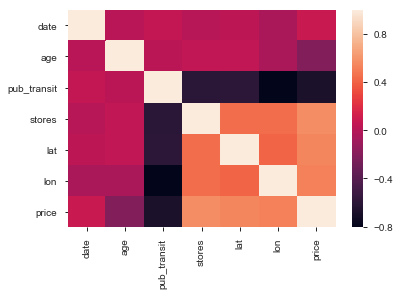

In [9]:
#heatmap for visualizing the correlations between the variables
import seaborn as sns
sns.heatmap(corr)

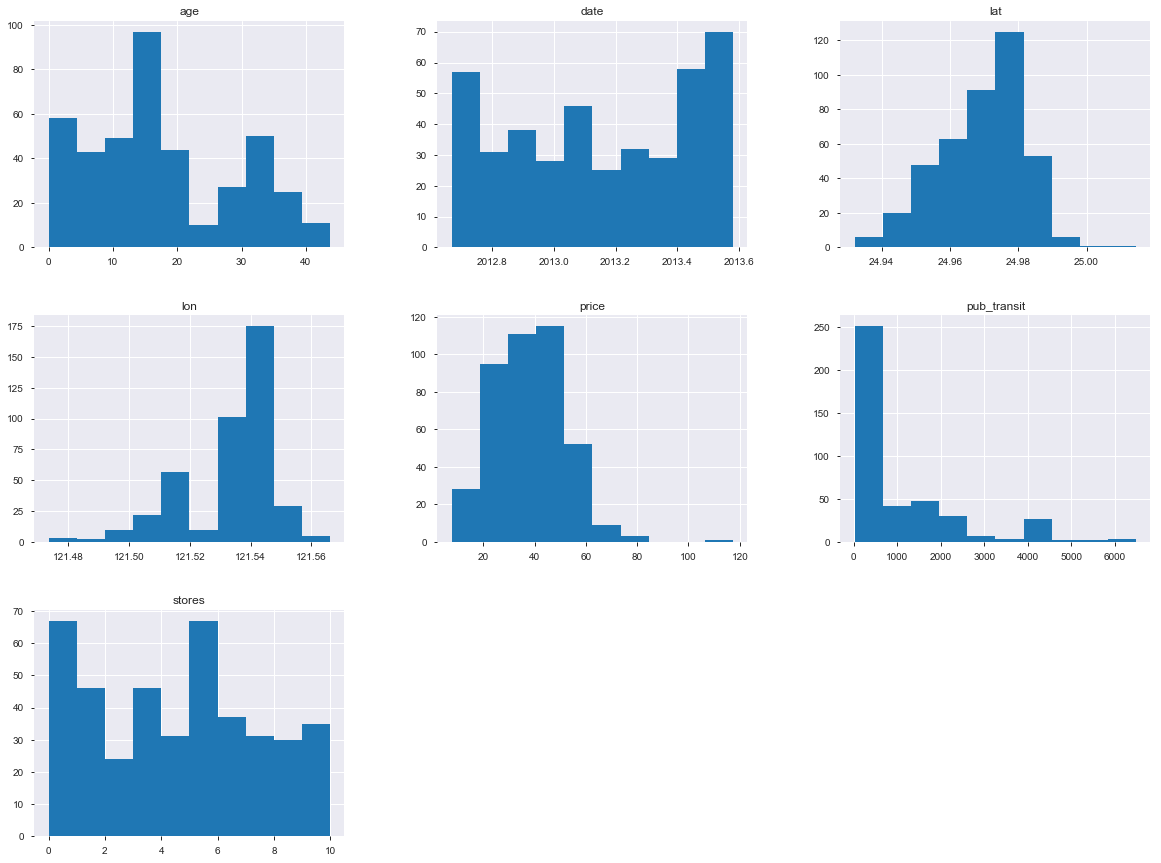

In [10]:
# histograms
df1.hist(bins=10, figsize=(20, 15))
pyplot.show()

There is clear evidence above in the histograms above of several columnss/features not having normal/Gaussian distributions, thereby demonstrating a need for standardization

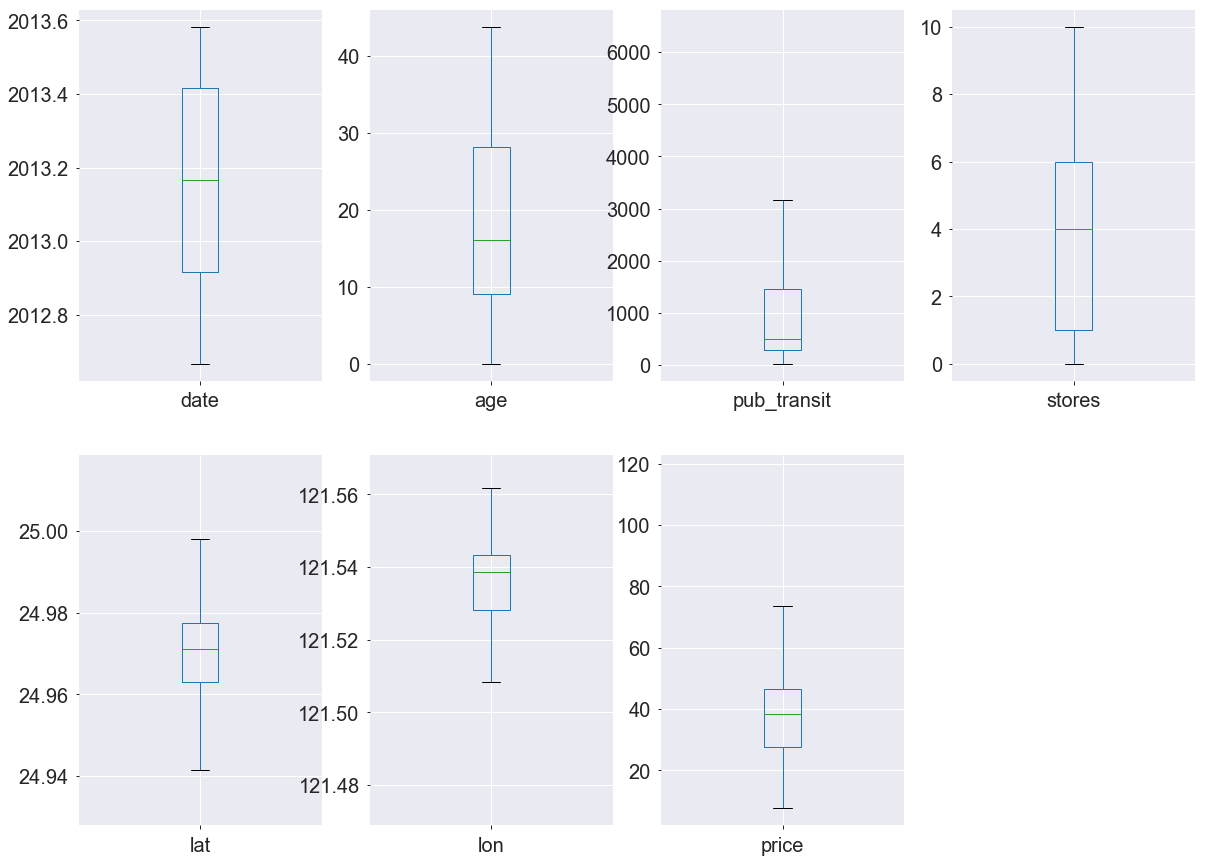

In [11]:
# box and whisker plots for checking data spread across columns. These plots are good for visualizing outliers.
df1.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False,
fontsize=20, figsize=(20, 15))
pyplot.show()

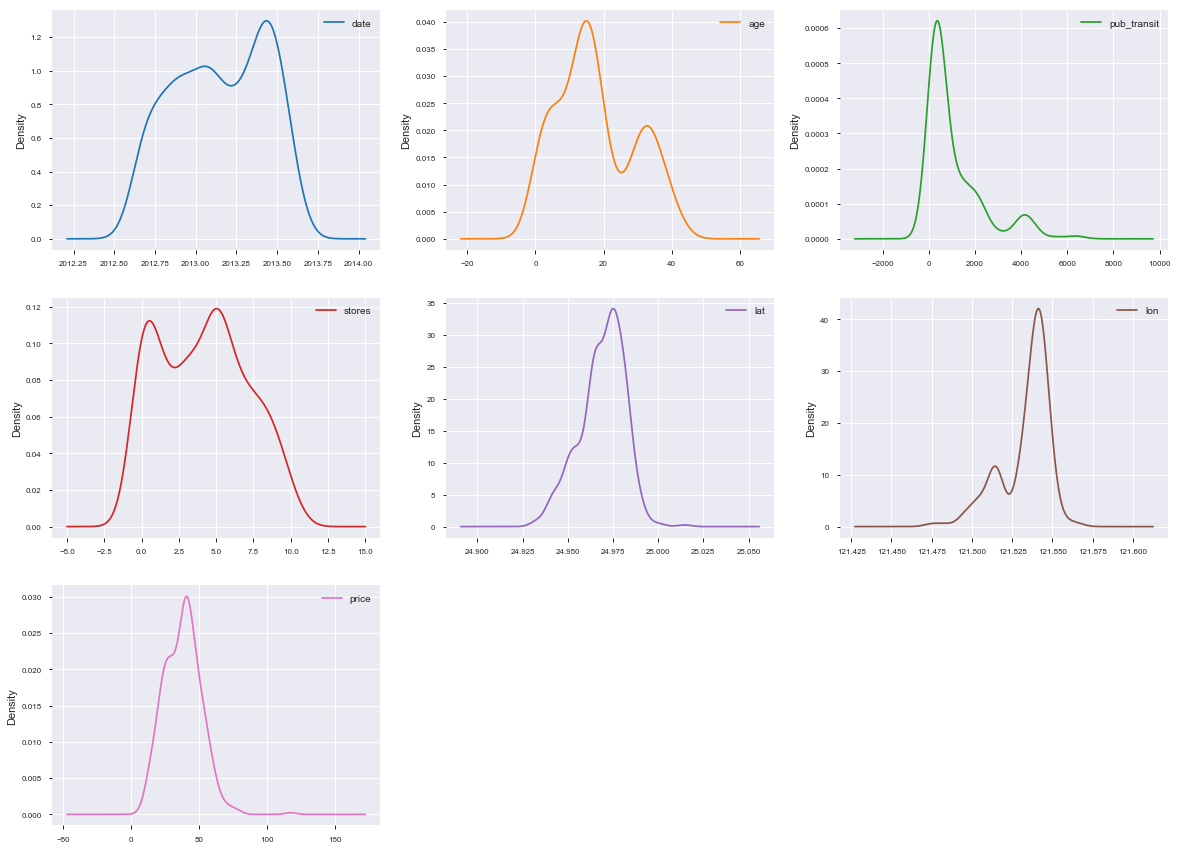

In [12]:
#density plots for distribution assessment of the different columns
df1.plot(kind="density", subplots=True, layout=(3,3), sharex=False, sharey=False, legend=True, fontsize=8, figsize=(20,15))
pyplot.show()

Scatter_matrix shows (helps visualize) interactions between the variables (both input and output), if any, is present. See below.

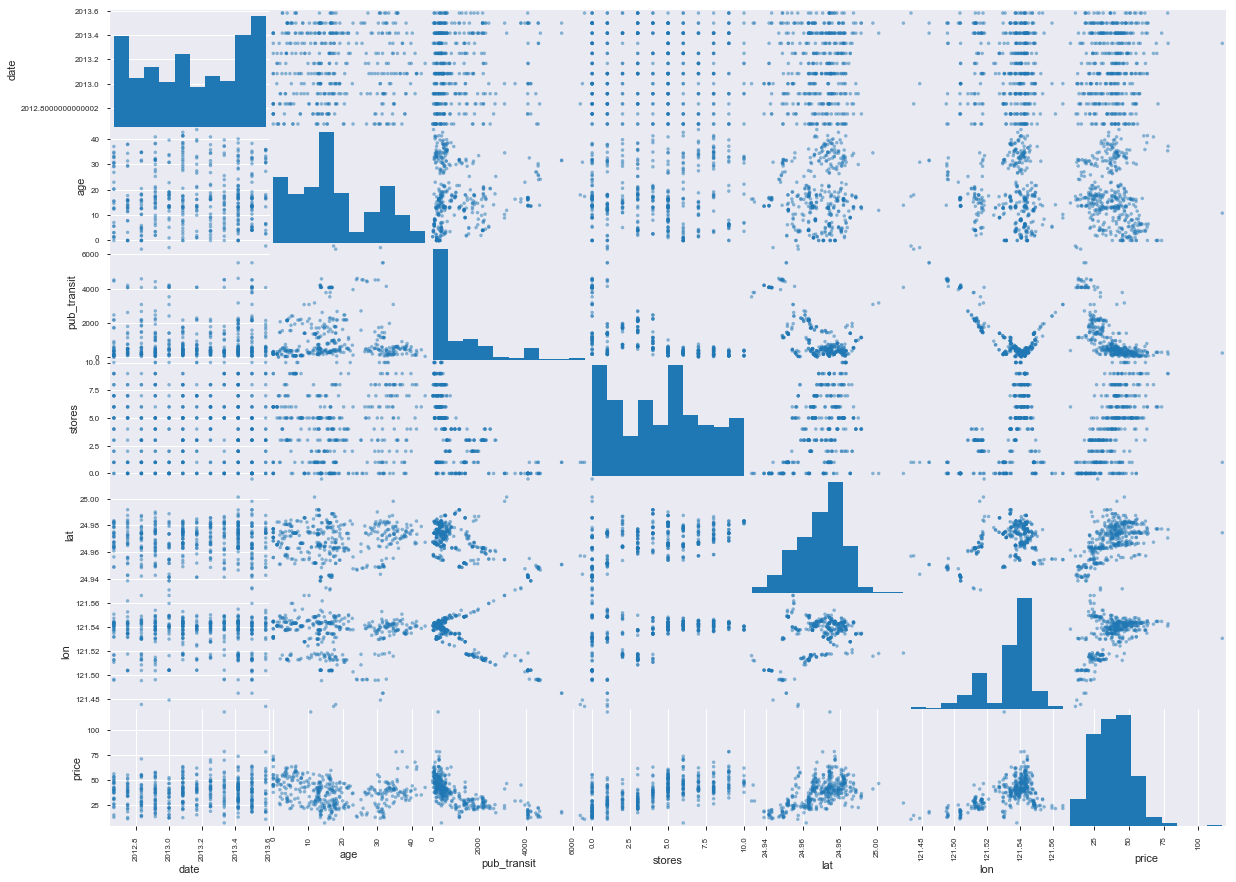

In [13]:
# scatter plot matrix
scatter_matrix(df1,figsize=(20, 15))
pyplot.show()

# Exploration for Insights - the "pandas-profiling" way - one line of code does it all!

In [14]:
profile = df1.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="realestate_pandas_profiling.html")

# What insights did we get from all of the above analysis?
1. Input features do NOT have normal/gaussian distributions. They are skewed. Some have long left-tails, some right.
2. Input features have varying scales. Date values are in 2000s, whereas, 'no. of stores' range from 0 to 10. Features with bigger values will dominate for some algorithms.
3. Relative to the output/target variable, correlation coefficients closer to 0 have no effect, whereas the ones closer to 1 or -1 have the most effect.
4. Data, prior to regression, is going to  need scaling/transformation, as many algorithms assume normal distributions. Not the decision tree algorithm, but linear algorithms.
5. A couple of our input features (Age, stores) had '0' (zero) values - to be kept in mind if/when doing log transformations.

Since public transit proximity had the highest absolute correlation value to the price, the plot below helps visualize how the price correlates to the proximity to public transit relative to latitude and longitude of the house

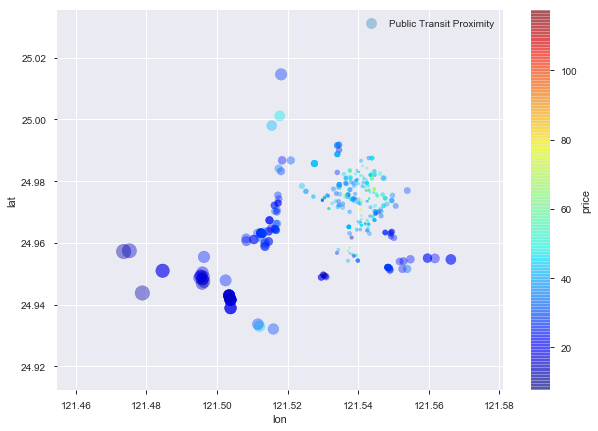

In [15]:
df1.plot(kind="scatter", x="lon", y="lat", alpha=0.4,
    s=df1["pub_transit"]/30, label="Public Transit Proximity", figsize=(10,7),
    c="price", cmap=pyplot.get_cmap("jet"), colorbar=True,
    sharex=False)
pyplot.legend()

Everything done upto this point helps reveal the distribution/scale of each feature, that will later help us determine the transforms that help make our model more accurate. Time for an inital linear regression without any scaling of features to establish a baseline

# Set test options and evaluation metric for Regression Algorithms: 
These will be constant as we determine the strength of regression algorithms on the original data, log-transformed data (to remove some of the skewness) and PCA transformed data to reduce some of the features.

Note that, we will be doing a KFold cross-validation for each of the regression algorithms to get the most reliable r2_score

In [16]:

num_folds = 10
seed = 7
scoring = 'r2'
validation_size = 0.25

# 1. Original Data - Spot-Check Regression Algorithms

# Let's define X and Y as part of the pre-processing routine and run a "Spot Algorithm Check" to see what we get with unmodified data. Our scoring metric is r^2.

In [17]:
alldata=df1.values
X=alldata[:,0:6]
Y=alldata[:,6]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)


In [18]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('Huber', HuberRegressor()))
models.append(('Ridge',Ridge()))
models.append(('Bay',BayesianRidge()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.604163 (0.137180)
LASSO: 0.567852 (0.139154)
EN: 0.567679 (0.138510)
KNN: 0.622970 (0.154962)
CART: 0.547368 (0.194054)
SVR: 0.131360 (0.061463)
Huber: 0.564040 (0.151240)
Ridge: 0.583320 (0.136671)
Bay: 0.573569 (0.139412)


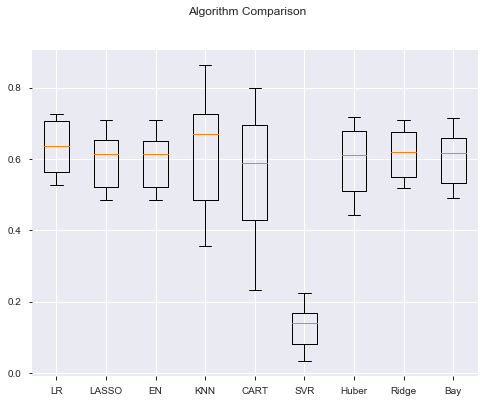

In [19]:
# Compare Algorithms
fig = pyplot.figure(figsize=(8,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3># Original Data - Evaluation of results from Spot-Check Regression:</h3>
<h4>1. The highest r2_score was noted to be 62.0% <br>
2. The associated algorithm was KNearestNeighbors(KNN). <br>
3. Our expectations were low going into this, given our insights from the data exploration section.</h4>

# 2. Log-Transformed Data - Spot-Check Regression Algorithms

In [20]:
#Given the long tails in some of the distributions, we will take a log transformation and store it in a new variable

Xlogtrans=np.log(X)
Ylogtrans=np.log(Y)
#Let's also remember that two features, "Age" and "Stores" had zero values, so log has changed into -ve infinity. 
#Let's change those back to zero.
Xlogtrans[Xlogtrans==-np.inf]=0

In [21]:
X_train, X_validation, Y_train, Y_validation = train_test_split(Xlogtrans, Ylogtrans,
test_size=validation_size, random_state=seed)

In [22]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('Huber', HuberRegressor()))
models.append(('Ridge',Ridge()))
models.append(('Bay',BayesianRidge()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.735760 (0.138906)
LASSO: -0.021095 (0.022929)
EN: -0.021095 (0.022929)
KNN: 0.688077 (0.168300)
CART: 0.652881 (0.146880)
SVR: 0.690184 (0.167345)
Huber: 0.665984 (0.168929)
Ridge: 0.616968 (0.167688)
Bay: 0.617268 (0.166716)


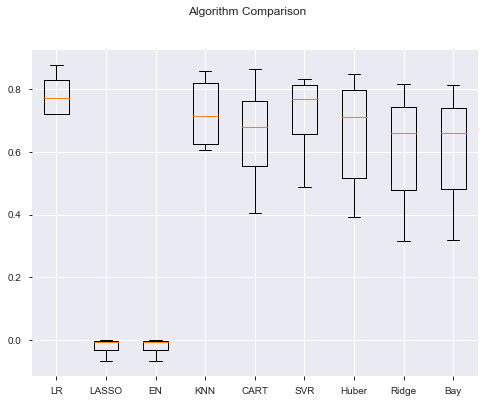

In [23]:
# Compare Algorithms
fig = pyplot.figure(figsize=(8,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3># Log-Transformed Data - Evaluation of results from Spot-Check Regression:</h3>
<h4>1. The highest r2_score was noted to be 73.6% (as compared to 61.0% for original data)  <br>
2. The associated algorithm was LinearRegression. <br>
3. Also, given that log-transform reduces skewness and made features normal-like, the r2_score for SVR increased from 13% to 69%</h4>

# 3. Feature Transformation using PCA - Spot Check Regression Algorithms
<h5> Since the log-transformed data yielded higher r2_scores, we are doing the feature reduction on the log-transformed data below</h5>

In [24]:
pca = PCA(whiten=True)
pca.fit(Xlogtrans)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)


array([0.59499109, 0.89766343, 0.99999993, 0.99999999, 1.        ,
       1.        ])

In [25]:
pca = PCA(n_components=4, whiten=True)
pca =pca.fit(Xlogtrans)
Xtrans_PCA = pca.transform(Xlogtrans)

In [26]:
X_train, X_validation, Y_train, Y_validation = train_test_split(Xtrans_PCA, Ylogtrans,
test_size=validation_size, random_state=seed)

In [27]:
# Spot-Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('Huber', HuberRegressor()))
models.append(('Ridge',Ridge()))
models.append(('Bay',BayesianRidge()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.710140 (0.160572)
LASSO: -0.021095 (0.022929)
EN: -0.021095 (0.022929)
KNN: 0.693062 (0.177827)
CART: 0.582300 (0.168790)
SVR: 0.764749 (0.146432)
Huber: 0.712587 (0.154045)
Ridge: 0.710373 (0.160032)
Bay: 0.710464 (0.159750)


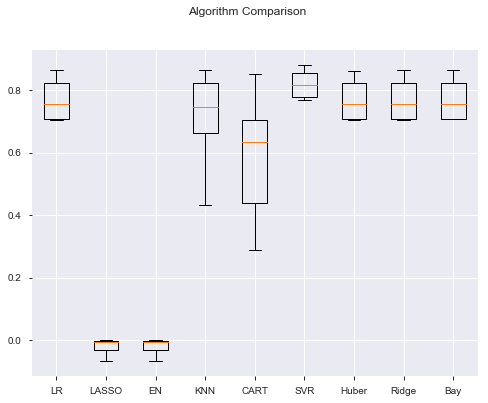

In [28]:
# Compare Algorithms
fig = pyplot.figure(figsize=(8,6))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3># PCA Transformed Data - Evaluation of results from Spot-Check Regression:</h3>
<h4>1. The highest r2_score was noted to be 76% (as compared to 73.2% for the log-transformed data and 63.0% for original data)  <br>
2. The associated algorithm was SVR. <br>
3. Could we increase the r2_score further for the SVR algorithm by standardizing (z-score reference) the features? Let's explore</h4>

# Feature Standardization using sklearn's pipeline feature

In [47]:
# Standardize the dataset using StandardScaler. Since the distributions are NOT normal/gaussian, 
#, we do not expect strong improvement/reduction in error, fromt the StandardScaler
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', preprocessing.StandardScaler()),('LR',
LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', preprocessing.StandardScaler()),('LASSO',
Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', preprocessing.StandardScaler()),('EN',
ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', preprocessing.StandardScaler()),('KNN',
KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', preprocessing.StandardScaler()),('CART',
DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', preprocessing.StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledHuber', Pipeline([('Scaler', preprocessing.StandardScaler()),('Huber', HuberRegressor())])))
pipelines.append(('ScaledRidge', Pipeline([('Scaler', preprocessing.StandardScaler()),('Ridge', Ridge())])))
pipelines.append(('ScaledBayesian', Pipeline([('Scaler', preprocessing.StandardScaler()),('BayesianRidge', BayesianRidge())])))
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: 0.710140 (0.160572)
ScaledLASSO: -0.021095 (0.022929)
ScaledEN: -0.021095 (0.022929)
ScaledKNN: 0.695935 (0.170668)
ScaledCART: 0.584511 (0.152630)
ScaledSVR: 0.765365 (0.146268)
ScaledHuber: 0.712587 (0.154045)
ScaledRidge: 0.710380 (0.160003)
ScaledBayesian: 0.710460 (0.159748)


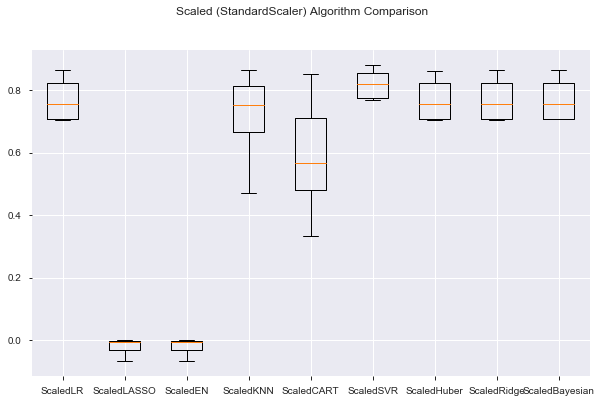

In [48]:
# Compare Algorithms
fig = pyplot.figure(figsize=(10,6))
fig.suptitle('Scaled (StandardScaler) Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

<h3># Pipeline with Standardized Data - Evaluation of results from Different Regression Algorithms:</h3>
<h4>1. The highest r2_score was noted to be 76.5% - only a very minor improvement was seen (as compared to 76% for the non-standardized data set)  <br>
2. The associated algorithm AGAIN was SVR. <br>
3. Let's see if RobustScaler can further boost this performance. MinMaxScaler was avoided due to its sensitivity to outliers</h4>

# Note, we have identified the best regression algorithm at this point - the SVR algorithm. It had the tightest distribution in terms of r2 scores generated in the KFold cross-validation - see in the plot above!

# Can SVR do better? Let's use GridSearch for parameter optimization to fine tune the performance of the SVR algorithm

In [49]:
# SVR was noted to be the best algorithm as it produced the highest r2-score as noted for the scaled dataset.
#So, let's tune the SVR algorithm using the GridSearch cross-validation feature from Scikit learn
scaler = preprocessing.StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
model = SVR()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=tuned_parameters, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)

In [50]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.733156 using {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.633160 (0.105329) with: {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.115753 (0.037243) with: {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.715940 (0.148608) with: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.633907 (0.105629) with: {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.727034 (0.144647) with: {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.712353 (0.151016) with: {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.733156 (0.144796) with: {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.715822 (0.151674) with: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.712851 (0.154587) with: {'C': 1, 'kernel': 'linear'}
0.712786 (0.154661) with: {'C': 10, 'kernel': 'linear'}
0.712709 (0.154675) with: {'C': 100, 'kernel': 'linear'}
0.712953 (0.154849) with: {'C': 1000, 'kernel': 'linear'}


<h3># Optimal Parameters for our SVR model, identified through grid search cross validation, were recorded above</h3>


# Can boosting and bagging algorithms further improve the performance of the model? 

In [53]:
# ensembles (b)
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', preprocessing.StandardScaler()),('AB',
AdaBoostRegressor())])))
ensembles.append(('ScaledGBR', Pipeline([('Scaler', preprocessing.StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', preprocessing.StandardScaler()),('RF',
RandomForestRegressor(n_estimators=10))])))
ensembles.append(('ScaledET', Pipeline([('Scaler', preprocessing.StandardScaler()),('ET',
ExtraTreesRegressor(n_estimators=10))])))
results = []
names = []
for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledAB: 0.706371 (0.156718)
ScaledGBR: 0.739689 (0.148760)
ScaledRF: 0.711387 (0.166378)
ScaledET: 0.717928 (0.140267)


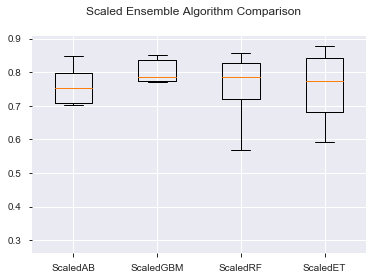

In [52]:
# Compare Algorithms
fig = pyplot.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# <h3>GradientBoostingRegressor(GBR) was the clear winner above in terms of a boosting/bagging algorithm to use with our SVR model. It had both the highest r2-score and the tightest distribution. Let's now fine tune GBR to see if we can push it even farther.</h3>

In [55]:
scaler = preprocessing.StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold,
iid=True)
grid_result = grid.fit(rescaledX, Y_train)

In [39]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.741602 using {'n_estimators': 100}
0.737042 (0.139753) with: {'n_estimators': 50}
0.741602 (0.149220) with: {'n_estimators': 100}
0.735731 (0.147017) with: {'n_estimators': 150}
0.729105 (0.149602) with: {'n_estimators': 200}
0.726423 (0.149570) with: {'n_estimators': 250}
0.722047 (0.152099) with: {'n_estimators': 300}
0.719865 (0.154365) with: {'n_estimators': 350}
0.717556 (0.155528) with: {'n_estimators': 400}


# <h3>NOTE: All of our testing so far has been on the 'Train' (training) dataset. Time to see how it works on our 'test/validation' (test) dataset</h3>

# Model Fitting/ Finalization - 'Test/validation' dataset

In [58]:
# prepare the model
scaler = preprocessing.StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=seed, n_estimators=100)
model.fit(rescaledX, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=7, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [59]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
pred_tuned = model.predict(rescaledValidationX)
print(f'R2-score: {r2_score(Y_validation, pred_tuned)}')

R2-score: 0.6283581135545613


In [64]:
#create a dataframe to plot Y_validation (actual) vs. pred_tuned (predicted) values 
dataset = pd.DataFrame({'Y_validation': Y_validation, 'pred_tuned': pred_tuned})
dataset=dataset.head(20)

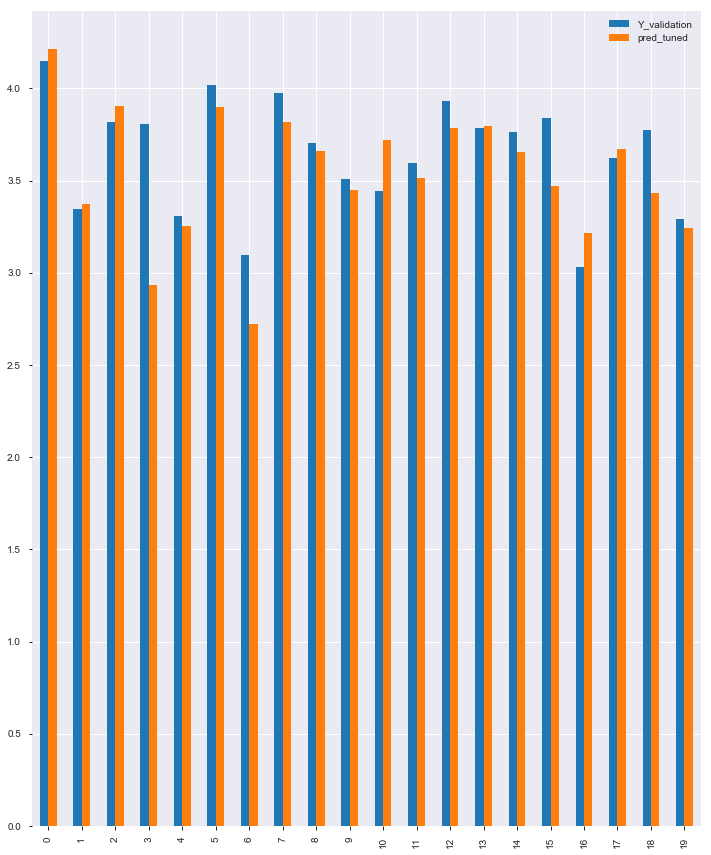

In [68]:
dataset.plot(kind='bar',figsize=(12,15))

# <h3> The r2-score for our tuned model fitted to the test/validation dataset was lower than what we were able to get with our training dataset. But that can be expected, given the differences in 'train' vs. 'test' dataset. However, based on the bar graph above, our predictive model seems to be relatively effective at determining prices.<h3>

# Now, let's save the model (in case new test data was available for the tuned predictive model) for future use

In [72]:
from sklearn.externals.joblib import dump
from sklearn.externals.joblib import load

In [73]:
#save the model to disk
filename = "real_estate_predictions.sav"
dump(model, open(filename, 'wb'))

In [75]:
#load the model from disk
loaded_model = load(filename)
result = loaded_model.score(X_validation,Y_validation)
print(f'r2_score: {result*100}%')

r2_score: 62.84358455832116%


# Summary

1. Data Exploration - Dataset loading and data integrity Check, Correlation Statistics/Matrix to identify interactions between variables, Histograms to identify feature distributions (skewed, normal, tail-lenghts, etc.) was completed in this section.
2. Spot-Check Algorithms along with KFold Cross-validation:
    a. Original Data: Highest r2_score was 60% (our expectations were low)
    b. Log-Transformed Data (to remove skewness) was effective at raising the r2_score to 70%
    c. PCA Decomposition was further effective at raising the r2_score to 75%
    d. Data had not been standardized until this point
3. Using Scikit's pipeline feature, the same regression algorithms were applied to the standardized/scaled features.
4. SVR was identified as the clear winner.
4. Parameter Optimization was done for our SVR model using GridSearchCV.
5. Ensemble Method - From the four(4) combined Bagging and Boosting Algorithms to further improve the regression model, GradientBoostingRegressor had the best performance.
6. Ensemble Tuning was used to further improve the performance of the model, but it did not have much of an effect. 
7. Then, the test/validation dataset that was held out, was fitted to the tuned model, and yielded a r2_score of 62%
8. Finally, the model was saved using Pickle, for future use, if more test data were to become available for the dataset.


Overall, the analysis clearly showed an improvement in the predictive performance of the model, however, the model is noted to not be strong enough. The following could help yield a better model for the dataset:

1. Column/feature specific transformation
2. Better feature selection by the dataset providers - this dataset, for being a housing dataset, is obviously lacking in critical details/factors, such as the number of bedrooms, number of bathrooms, type of house, etc., thereby limiting the extent of the predictive model built.

Credit for the framework of the machine learning regression analysis must be given to this very resourceful site: www.machinelearningmastery.com